--- Step 1: Synthetic Data Generated Successfully ---
        PM2.5     Ozone        NO2  Temperature   Humidity   AQI_Value
0   56.181018  0.018513  26.170568    25.181090  64.319753   53.196146
1  142.607146  0.054190  24.697880    28.900442  78.325940  130.655624
2  109.799091  0.087295  90.625458    12.514037  75.609656  107.737988
3   89.798773  0.073222  24.954620    23.746223  39.233994   94.366141
4   23.402796  0.080656  27.194973    22.152379  38.954968   26.090946


--- Step 2: AQI Classes Defined ---
Distribution of new AQI classes:
AQI_Class
Good         346
Moderate     338
Unhealthy    316
Name: count, dtype: int64


--- Step 3: Model Training Complete ---

--- Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

        Good       0.99      0.95      0.97        87
    Moderate       0.93      0.96      0.95        84
   Unhealthy       0.97      0.97      0.97        79

    accuracy                           0.96       250

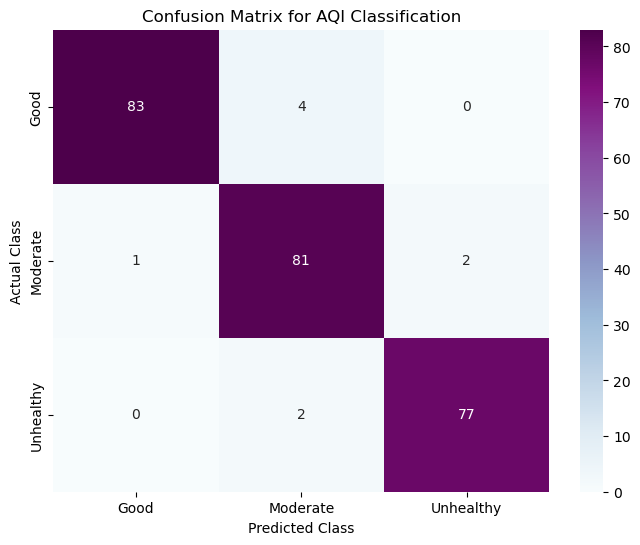

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Generate a Realistic Synthetic Dataset ---
    # No downloads needed! We create the data ourselves.
    np.random.seed(42)
    num_samples = 1000

    # Generate realistic sensor readings for key pollutants
    pm25 = np.random.uniform(0, 150, num_samples)    # Particulate Matter 2.5
    ozone = np.random.uniform(0, 0.1, num_samples)   # Ozone
    no2 = np.random.uniform(0, 100, num_samples)     # Nitrogen Dioxide
    temp = np.random.uniform(5, 35, num_samples)     # Temperature in Celsius
    humidity = np.random.uniform(30, 90, num_samples) # Relative Humidity

    df = pd.DataFrame({
        'PM2.5': pm25,
        'Ozone': ozone,
        'NO2': no2,
        'Temperature': temp,
        'Humidity': humidity
    })
    
    # Create a simplified Air Quality Index (AQI) value based on PM2.5
    # This simulates how a real AQI is often driven by the worst pollutant.
    df['AQI_Value'] = df['PM2.5'] + np.random.normal(0, 5, num_samples)
    
    print("--- Step 1: Synthetic Data Generated Successfully ---")
    print(df.head())
    print("\n")

    # --- Step 2: Define Classes ---
    # Create categorical AQI levels from the numerical AQI values.
    bins = [-np.inf, 50, 100, np.inf]
    labels = ['Good', 'Moderate', 'Unhealthy']
    df['AQI_Class'] = pd.cut(df['AQI_Value'], bins=bins, labels=labels)
    df = df.dropna() # Drop any rows that might have NaN AQI_Class if AQI_Value was negative
    
    print("--- Step 2: AQI Classes Defined ---")
    print("Distribution of new AQI classes:")
    print(df['AQI_Class'].value_counts())
    print("\n")

    # --- Preprocessing and Splitting ---
    X = df[['PM2.5', 'Ozone', 'NO2', 'Temperature', 'Humidity']]
    y = df['AQI_Class']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # --- Step 3: Train the Random Forest Model ---
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    print("--- Step 3: Model Training Complete ---\n")

    # --- Evaluation ---
    y_pred = model.predict(X_test)
    
    print("--- Model Evaluation ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Generate and save the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Confusion Matrix for AQI Classification')
    plt.savefig('aqi_confusion_matrix.png')
    print("\nConfusion matrix saved as 'aqi_confusion_matrix.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")